In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset
df = pd.read_csv('data/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# checking the shape of dataset
df.shape

# there are total 51717 samples with 17 features.

(51717, 17)

In [5]:
# get all features
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
# checking missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# checking datatypes
df.info()

# there are so many object type columns, we have to convert them into numeric type. letter we will convert oject dtype to numeric type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# data summary
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Data Cleaning

###### there are so many null values.we can clearly see that in the 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines' and 'approx_cost(for two people)' these columns have missing values.So firstly we have to handle the missing values.

In [9]:
# Removing the unnecessary columns form data
df = df.drop(['url', 'phone'], axis = 1) 

In [10]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


###### Droping null or missing values can cause various loss of data due to 'dish_liked' column

In [11]:
# handling dish_liked column
df['dish_liked'] = df['dish_liked'].fillna('')
df['dish_liked'] = df['dish_liked'].apply(lambda x: 0 if x=="" else len(x.split(',')))

In [12]:
# now checking missing values
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
dish_liked                        0
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [13]:
# handling missing values by droping null values from the columns
df.dropna(inplace=True)

In [14]:
# checking duplicate values and remove them 
df.drop_duplicates(inplace=True)

In [15]:
# Now there are no duplicate values.
df.duplicated().sum()

0

In [16]:
#  Renaming the columns appropriately
df = df.rename(columns = {'approx_cost(for two people)':'cost',
                         'listed_in(type)':'type', 'listed_in(city)': 'city'})
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,7,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,7,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",7,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,1,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,2,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


###### cleaning the "cost" column

In [17]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [18]:
# cleaning cost column and convert into numerical column
df['cost'] = df['cost'].str.replace(',','').astype('float')

In [19]:
# getting cost per person
df['cost'] = df['cost'].apply(lambda x: x/2)

###### handling the rate columns

In [20]:
# get rate status
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
# clean rate column removing unwanted values and convert into numerical col.
df['rate'] = df['rate'].str.replace('NEW','0')
df['rate'] = df['rate'].str.replace('-','0')
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0].strip(' ')).astype('float')

Data Visualization

###### Most famous restaurant chains in banaglore

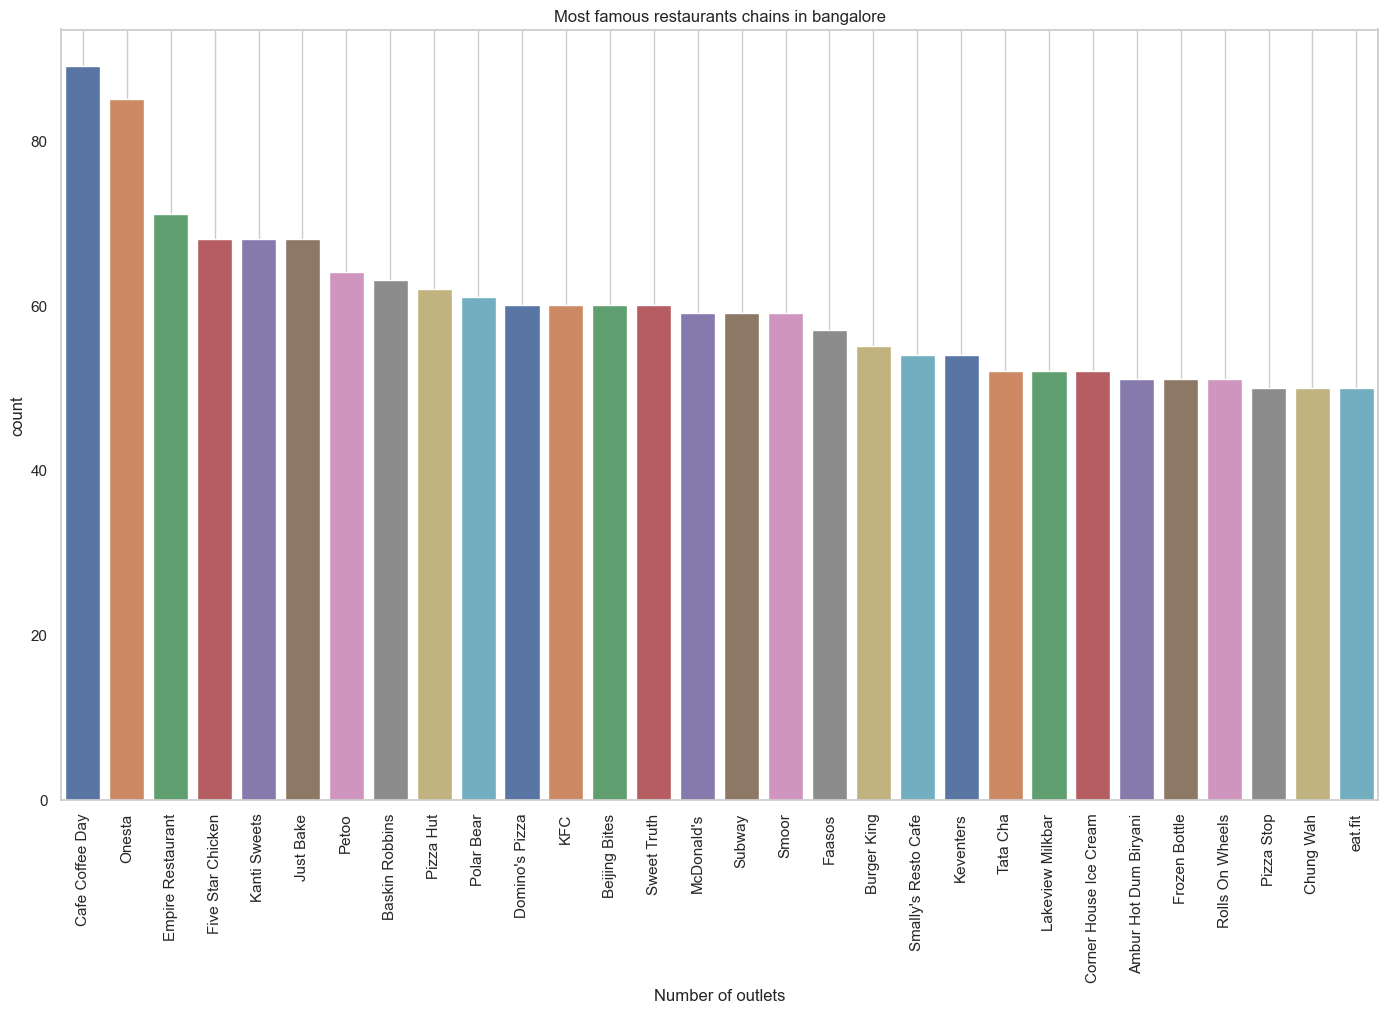

In [22]:
sns.set_theme(style='whitegrid')
plt.figure(figsize = (17,10))
chains = df['name'].value_counts()[:30]
sns.barplot(x = chains.index, y=  chains,  palette= 'deep')
plt.grid()
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.xticks(rotation=90)
plt.show()

###### **Insights:**  **'Onesta', 'Empire Restaurant' & 'KFC'** are the most famous restaurant in bangalore.

###### checking online order or not

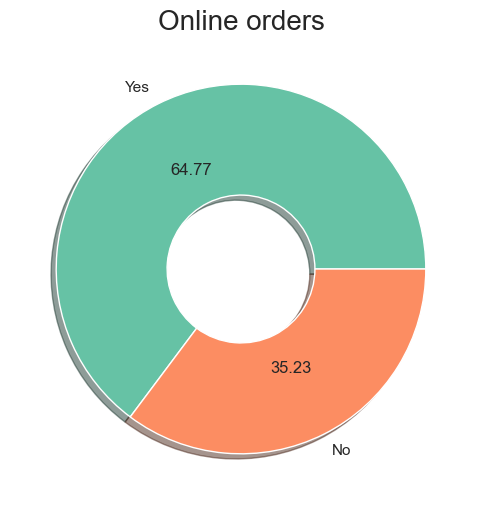

In [23]:
v = df['online_order'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Online orders', fontsize = 20)
plt.show()

###### **Insights :** Most of the orders are online

###### Book table or not

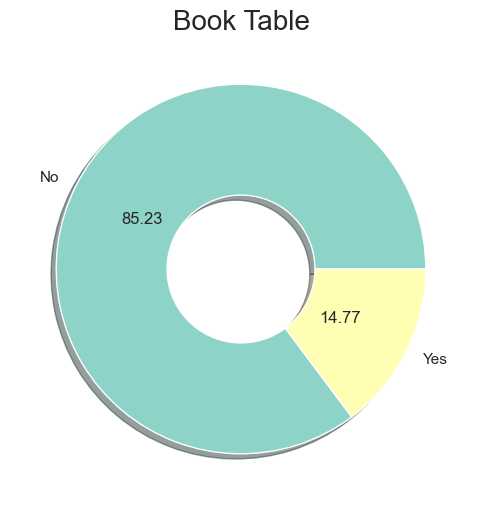

In [24]:
v = df['book_table'].value_counts()

fig = plt.gcf()
fig.set_size_inches((8,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Book Table', fontsize = 20)
plt.show()

###### **Insights :** Most of restaurants doesn't offer table booking.

###### Get Rating Distribution

<Figure size 640x480 with 0 Axes>

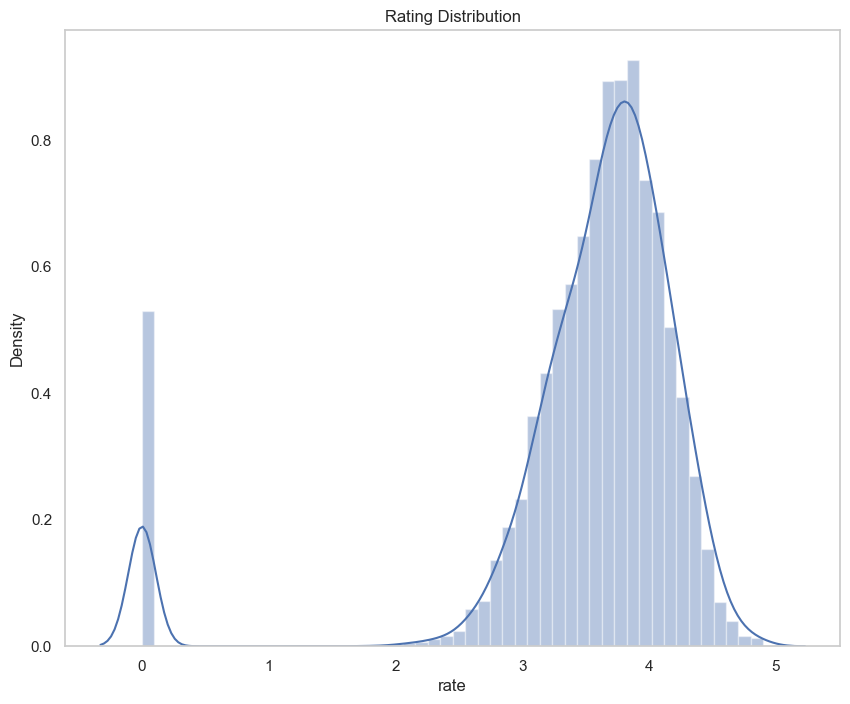

In [25]:
plt.tight_layout()
plt.figure(figsize = (10,8))
sns.distplot(df['rate'])
plt.grid()
plt.title('Rating Distribution')
plt.show()

###### **Insights :**
###### Normally distributed so we can think of regression
###### We can infer from above that most of the ratings are within 3.5 and 4.5

###### Location Information

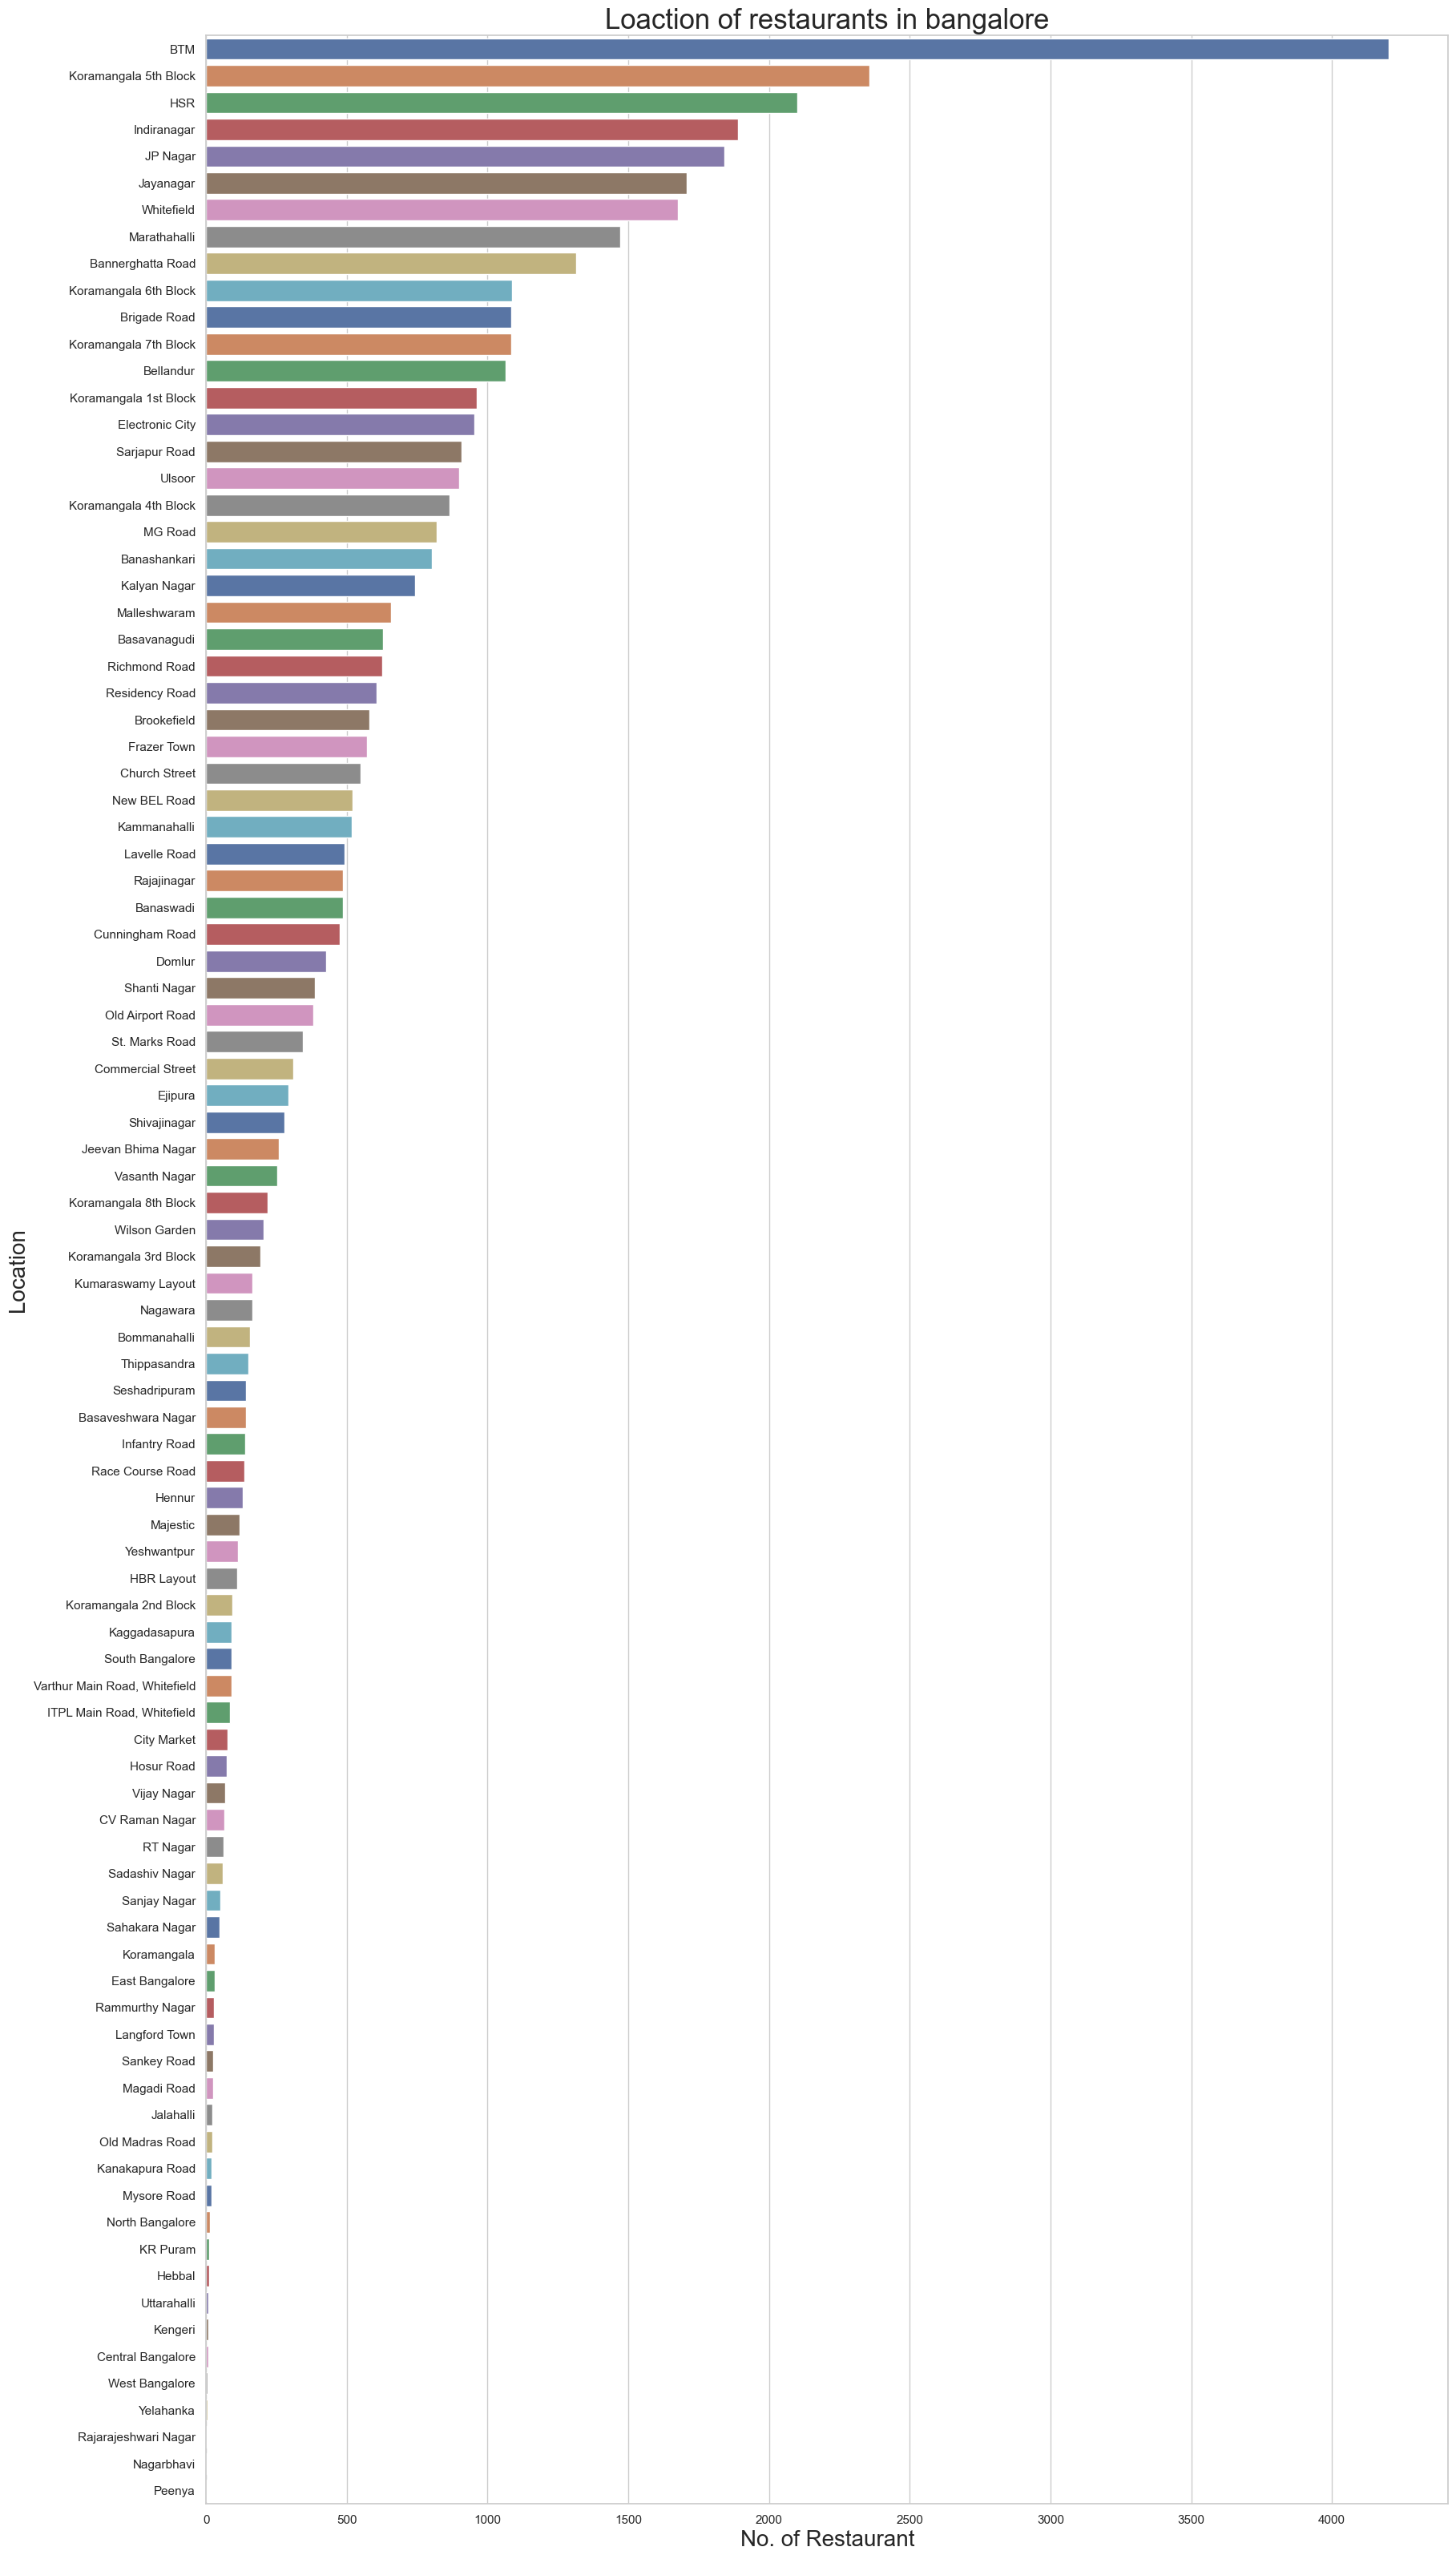

In [26]:
plt.figure(figsize=  (20,40))
chains = df['location'].value_counts()#[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Loaction of restaurants in bangalore',fontsize=25)
plt.xlabel('No. of Restaurant',fontsize=20)
plt.ylabel('Location',fontsize=20)
plt.show()

###### **Insight:**

 * ###### Here above we can see that most of the restaurants located in 'Koramangala 5th Block', 'BTM' & 'Indiranagar'.
 * ###### Then least restaurants are located 'KR Puram', 'Kanakapura', 'Magadi Road'.
 

######  Restaurant Type

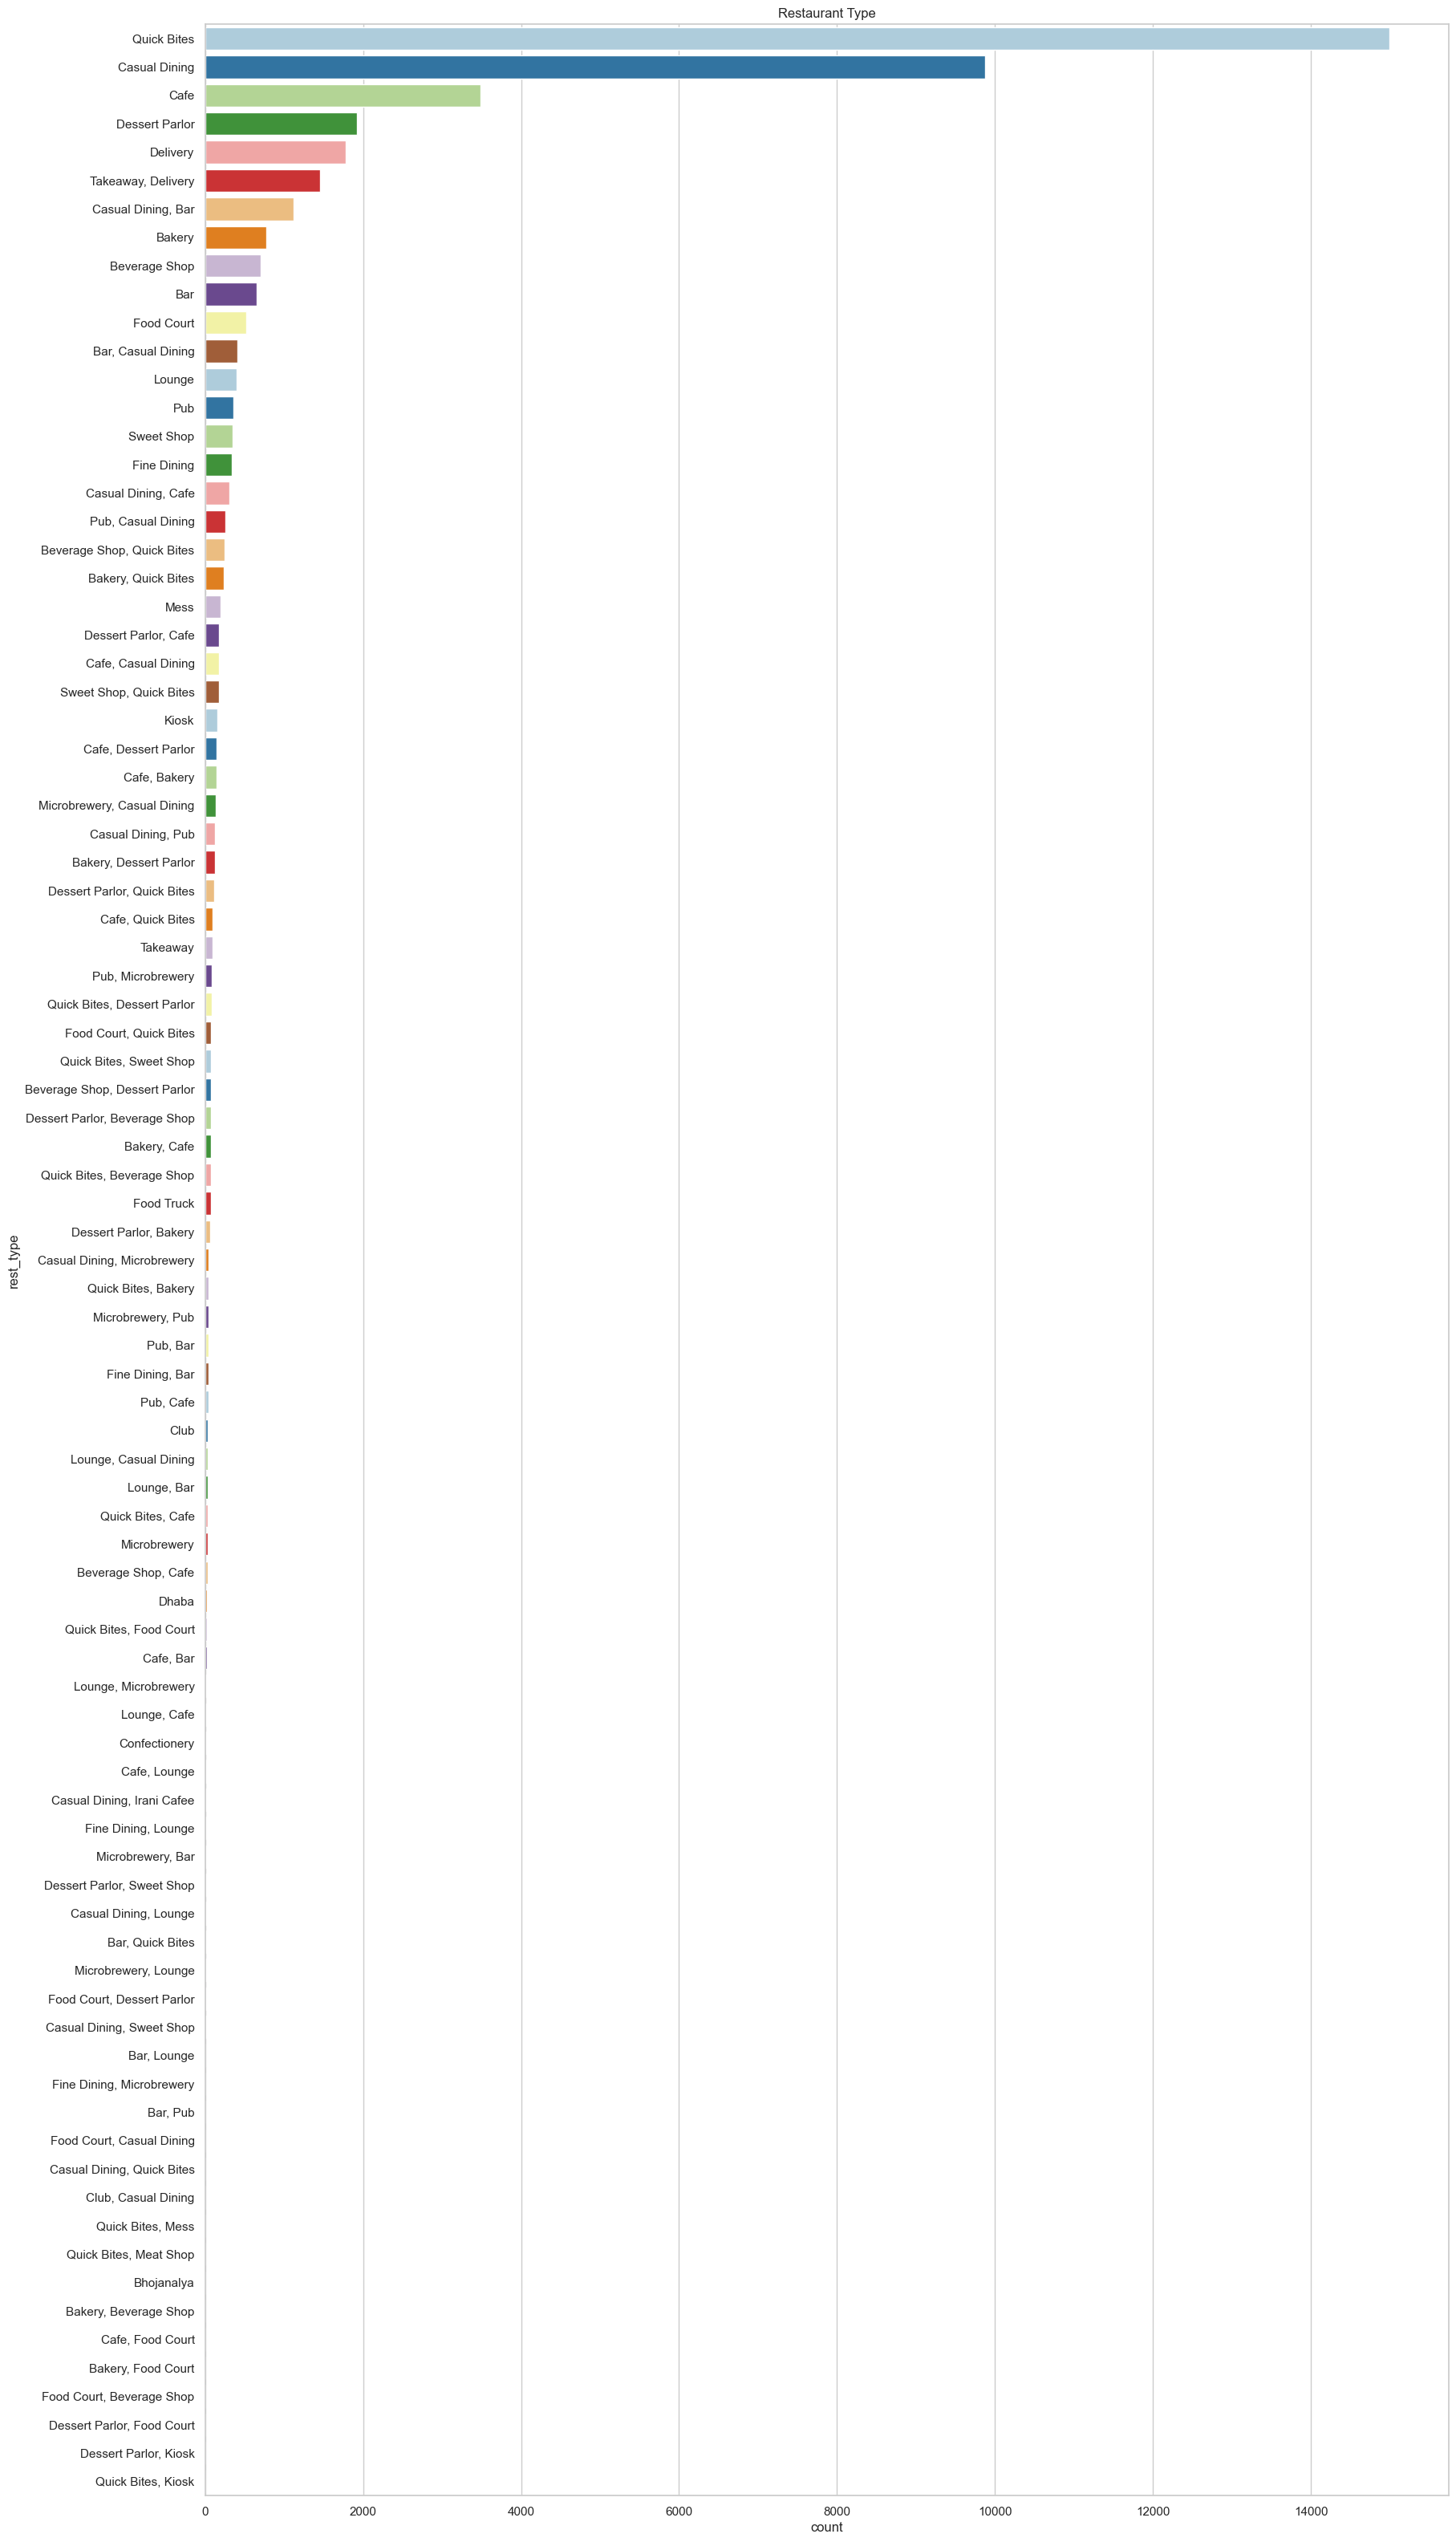

In [27]:
plt.figure(figsize = (20,40))
t = df['rest_type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()
plt.show()

###### **Insight:**

* ###### 'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of restaurant.
* ###### 'Food Court, Casual Dining', 'Dhaba' are the least common.

###### Most popular cuisines of Bangalore

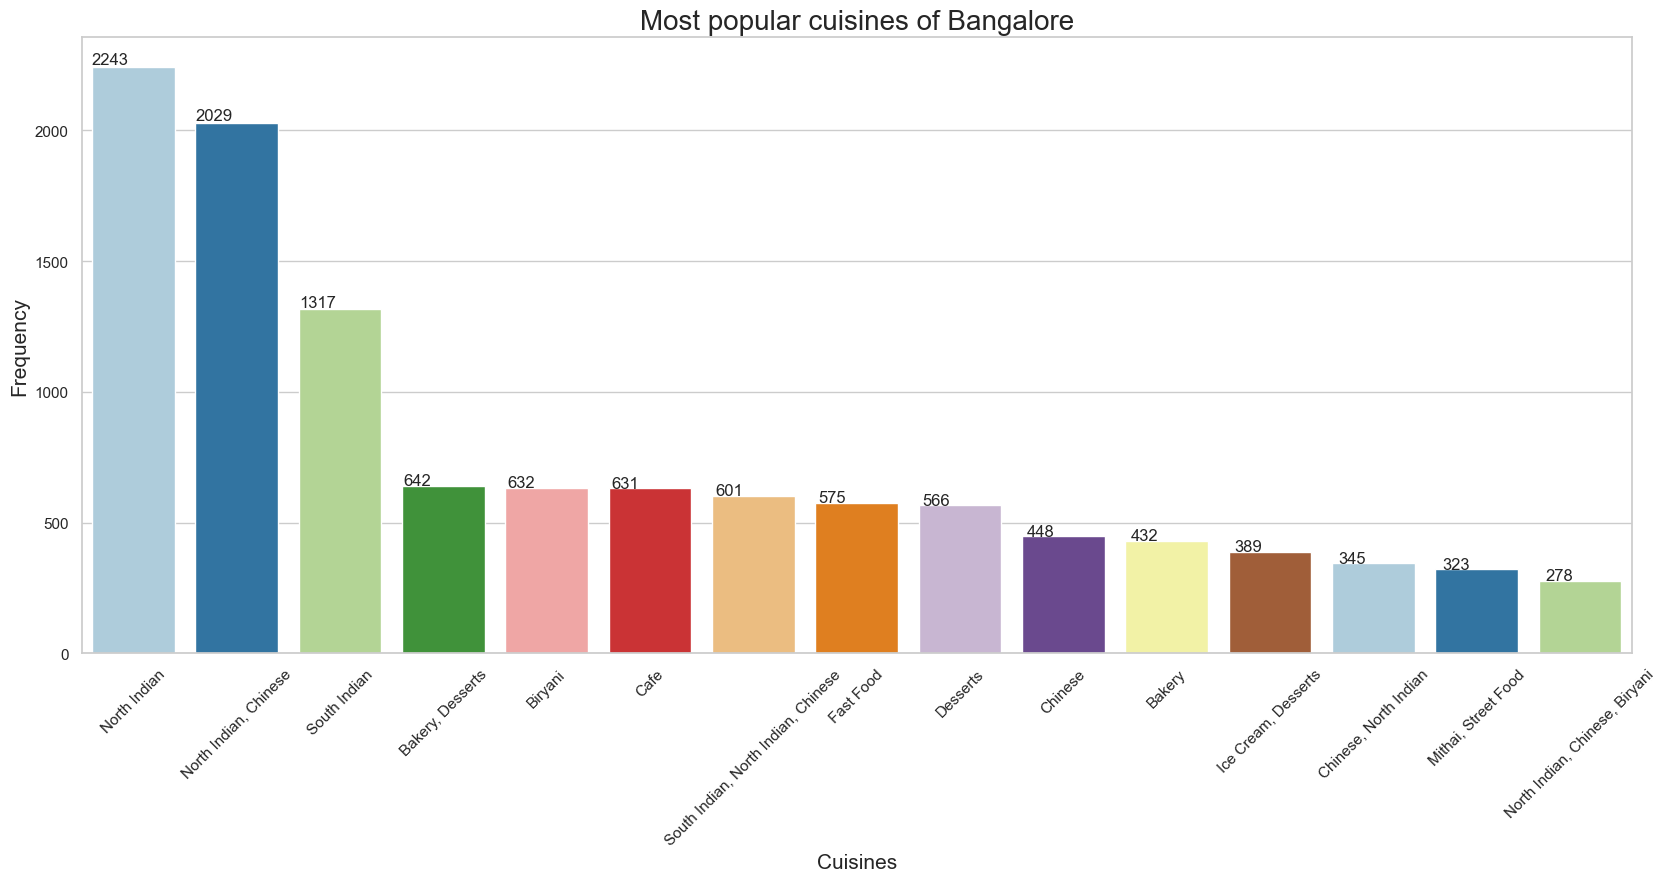

In [28]:
v = df['cuisines'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()*1.005, i.get_height()*1.005))


plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =45)
plt.show()

###### **Insights :**  Here form above we can see that ***North Indian Cuisines*** are most famous in bangalore restaurants.

###### Distribution of Cost of Food of a Person

* contains the approximate cost of meal of a person

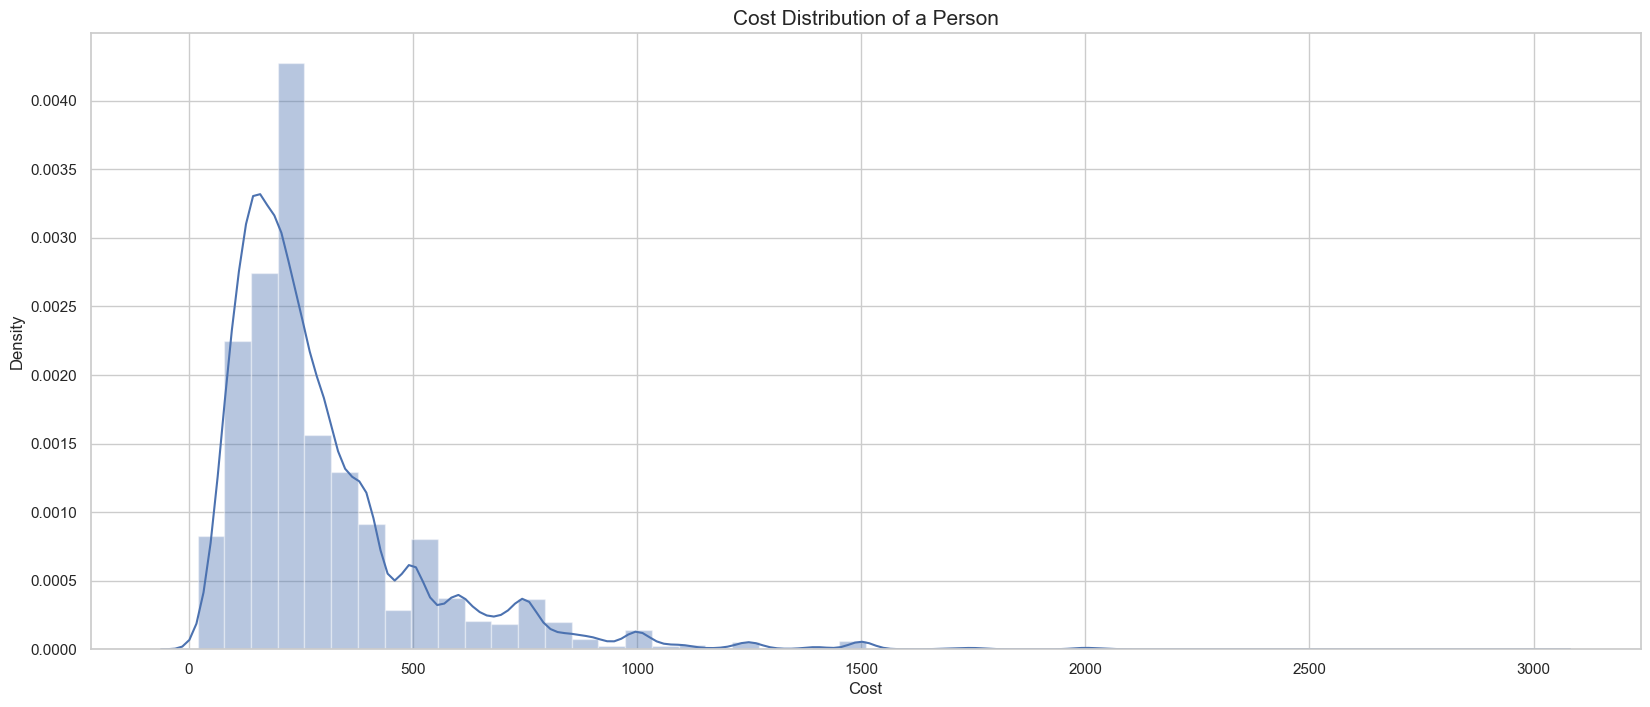

In [29]:
plt.figure(figsize=(20,8))
sns.distplot(df['cost'])
plt.title("Cost Distribution of a Person",fontsize=15)
plt.xlabel("Cost")
plt.show()

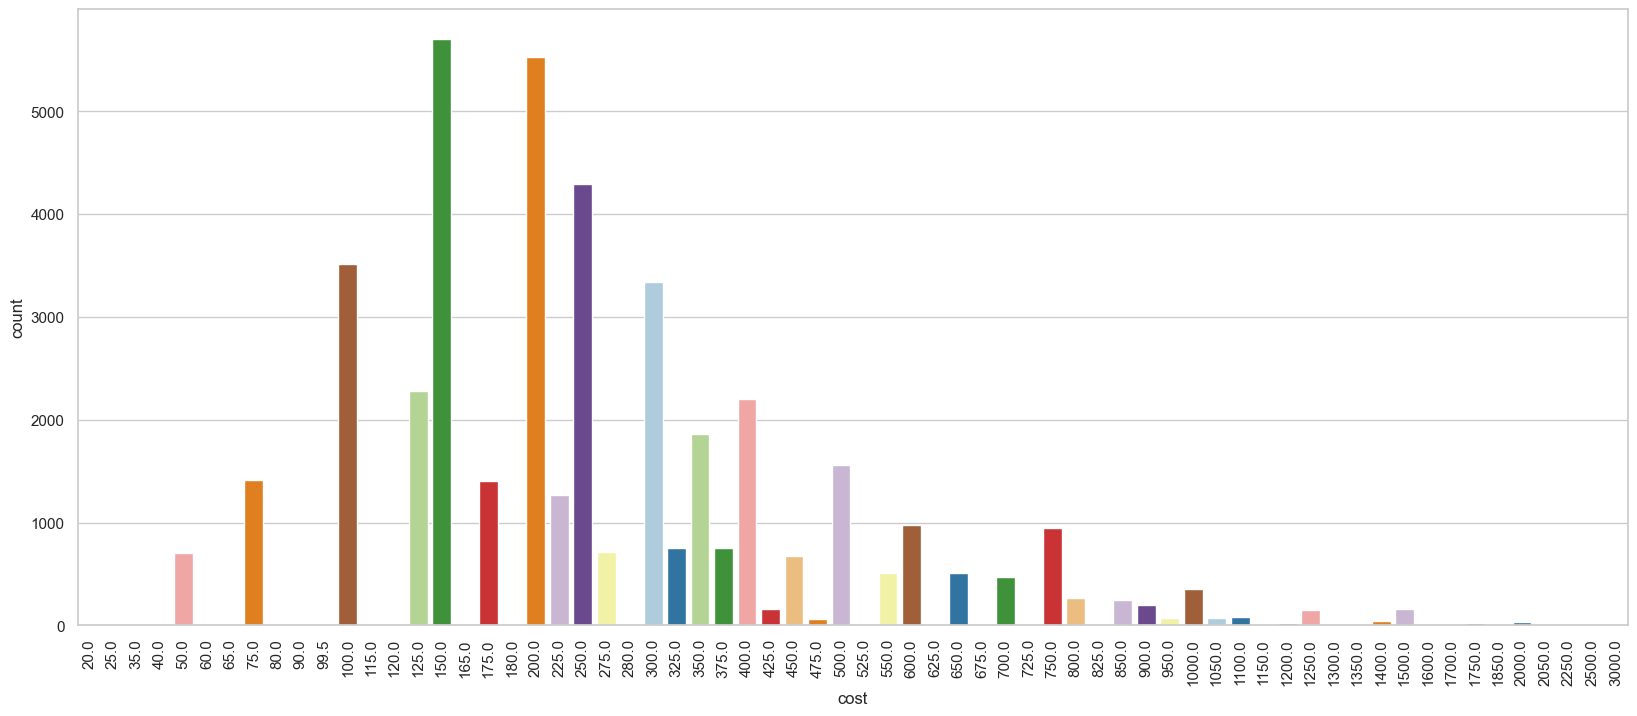

In [30]:
v = df['cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

###### **Insights :** Here form above we can that most common price of a person is 150 & 200 in bangalore restaurants.

###### Category Types

In [31]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

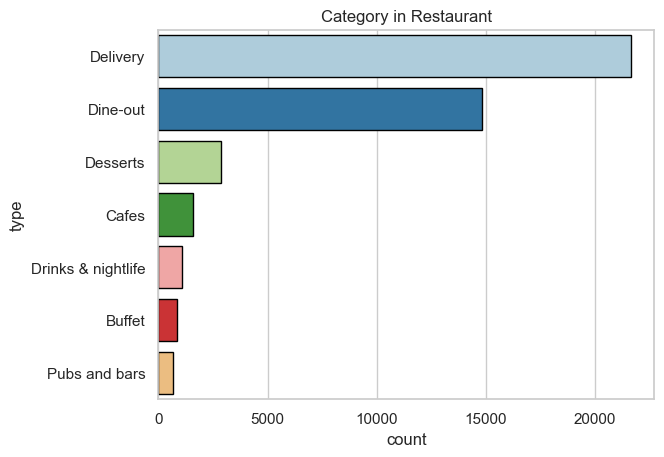

In [32]:
t = df['type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired',edgecolor='black')
plt.title('Category in Restaurant')
plt.show()


###### **Insights:** Here the two main service types are Delivery and Dine-out.

 ###### Highest vote of restaurant

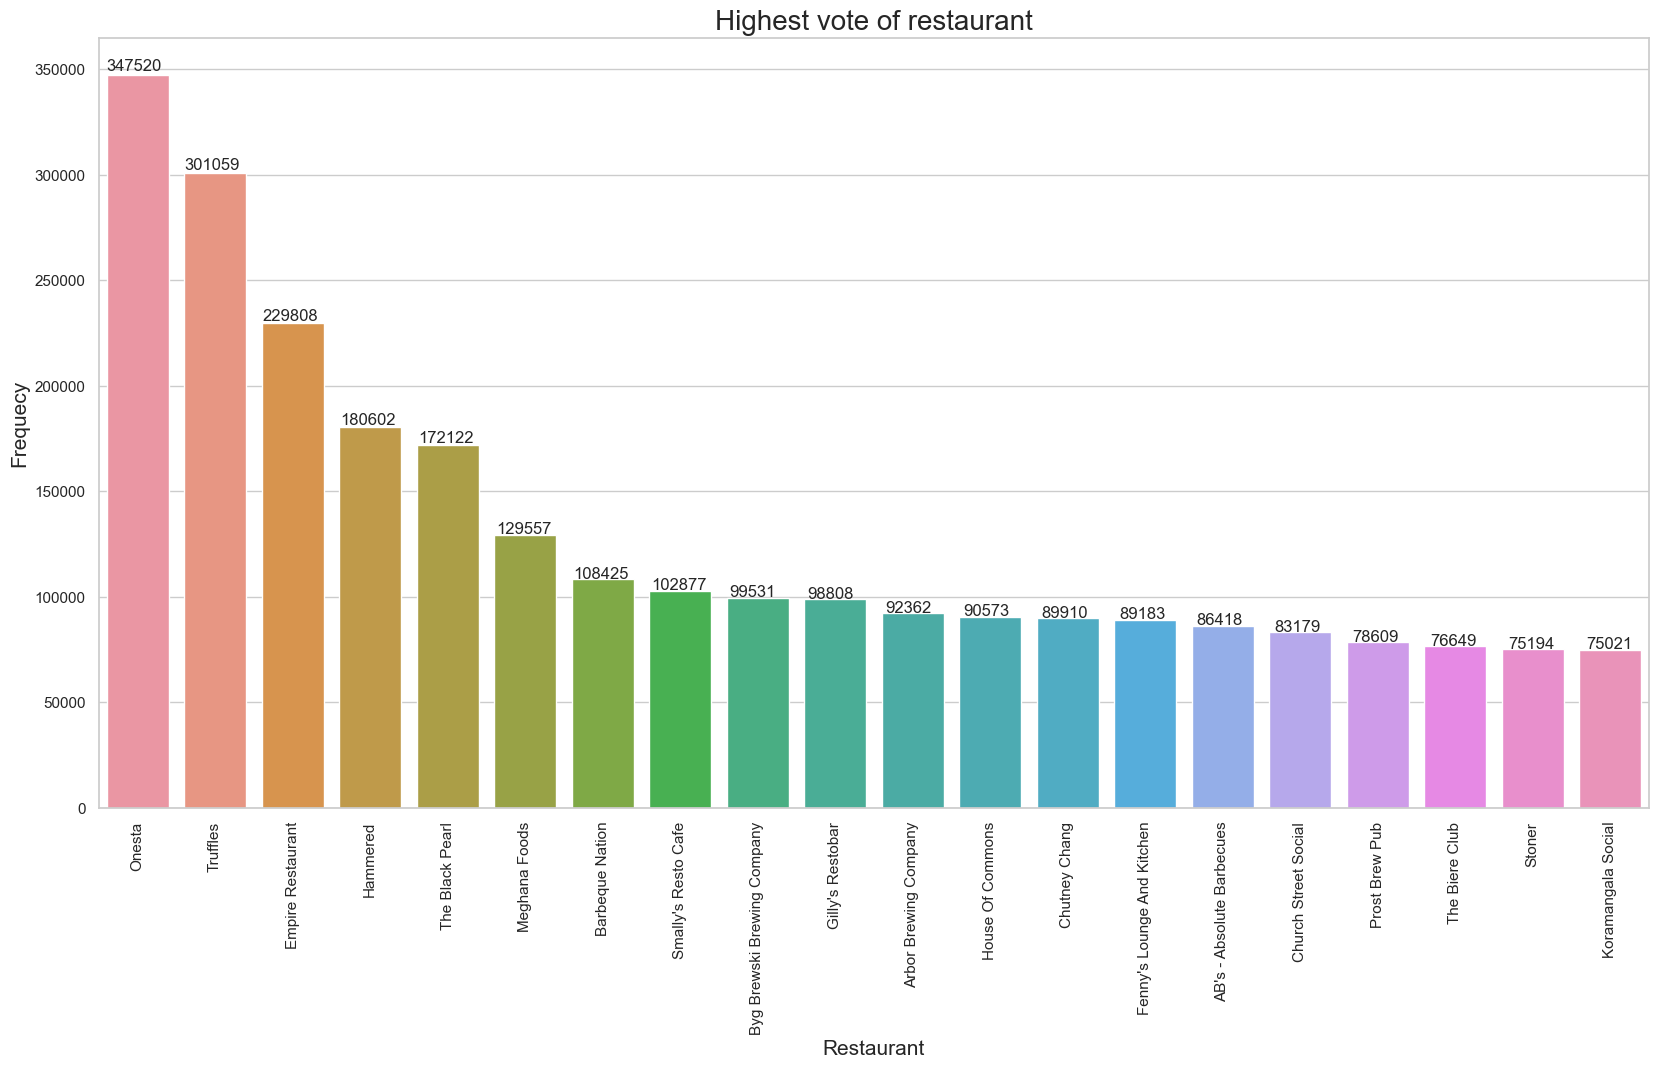

In [33]:
name_grp = df.groupby('name')
v = name_grp['votes'].agg(np.sum).sort_values(ascending = False)[:20]  ## Here i selected 20 restaurant based on high votes

plt.figure(figsize = (20,10))
ax = sns.barplot(y = v, x = v.index)

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()* 1.005, i.get_height()*1.005))


plt.title('Highest vote of restaurant', fontsize = 20)
plt.xlabel('Restaurant', fontsize = 15)
plt.ylabel('Frequecy', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

###### **Insights:** Here from the analysis, we can see that ***'Onesta', 'Truffles' & 'Empire Restaurant'*** are highly voted restaurants.

Data Preprocessing

In [34]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,7,"North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,7,"Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",7,"Cafe, Mexican, Italian",400.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,1,"South Indian, North Indian",150.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,2,"North Indian, Rajasthani",300.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


###### Encode the categorical columns

In [38]:
# encode the online_order and book_table column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['online_order'] = encoder.fit_transform(df['online_order'])
df['book_table'] = encoder.fit_transform(df['book_table'])

In [40]:
df['menu_item'] = df['menu_item'].apply(lambda x: 0 if x=="[]" else 1)

In [43]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga